In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy.optimize import curve_fit

In [64]:
data = pd.read_csv("listaprocessadores.csv", sep="\t")
data["N_de_transistores_log"] = data["Numero_de_Transistores"].apply(np.log)

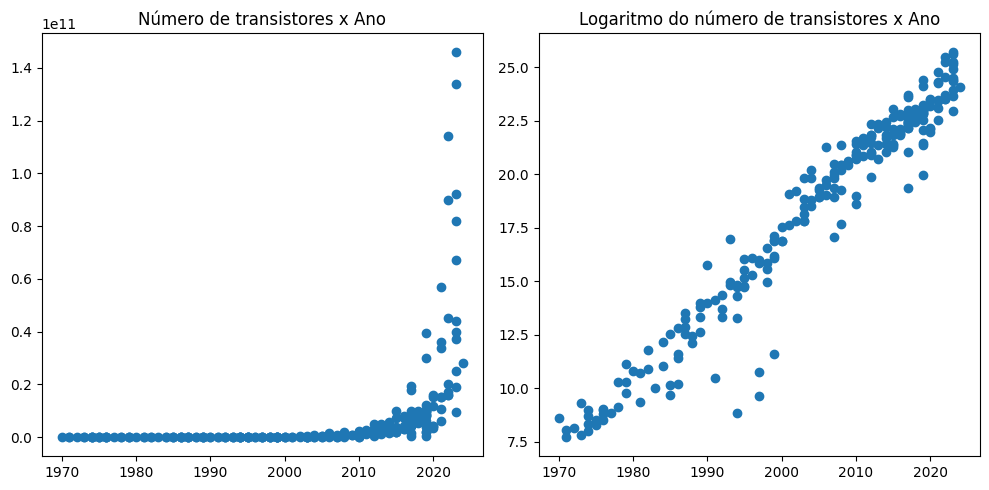

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(data["Ano"], data["Numero_de_Transistores"])
ax[0].set_title("Número de transistores x Ano")

ax[1].scatter(data["Ano"], data["N_de_transistores_log"])
ax[1].set_title("Logaritmo do número de transistores x Ano")
fig.tight_layout()
plt.show()

In [83]:
x_scaled = data["Ano"].index.values
y = data["Numero_de_Transistores"].values

Os coeficientes são: [0.06677708 9.19654178]


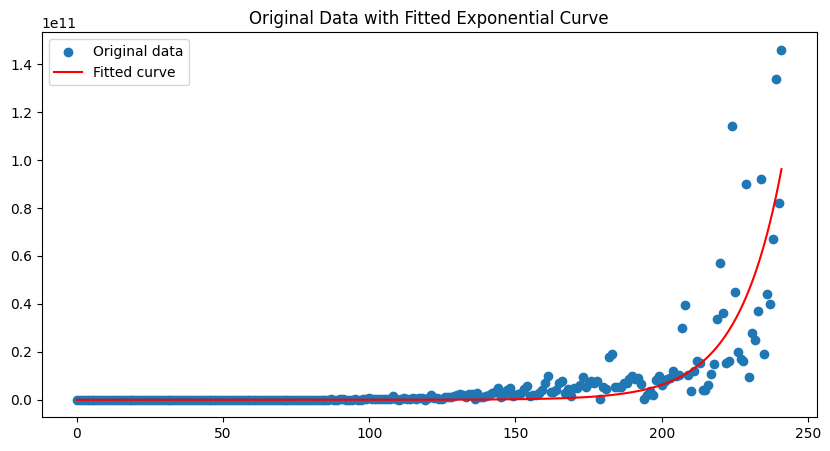

In [99]:
# Define the function to fit the exponential curve
def myfunc(x, a, b):
    return np.exp(a * x + b)


# Perform the curve fit with increased maxfev
popt, pcov = curve_fit(myfunc, x_scaled, y, maxfev=3000)
print(f"Os coeficientes são: {popt}")


# Plot the original data and the fitted curve
fig, ax = plt.subplots(figsize=(10, 5))

# First subplot with the original data and fitted curve
ax.scatter(x_scaled, y, label="Original data")
ax.plot(x_scaled, myfunc(x_scaled, *popt), "r", label="Fitted curve")
ax.set_title("Original Data with Fitted Exponential Curve")
ax.legend()


plt.show()

Os coeficientes são: [ 0.06822488 10.16664735]


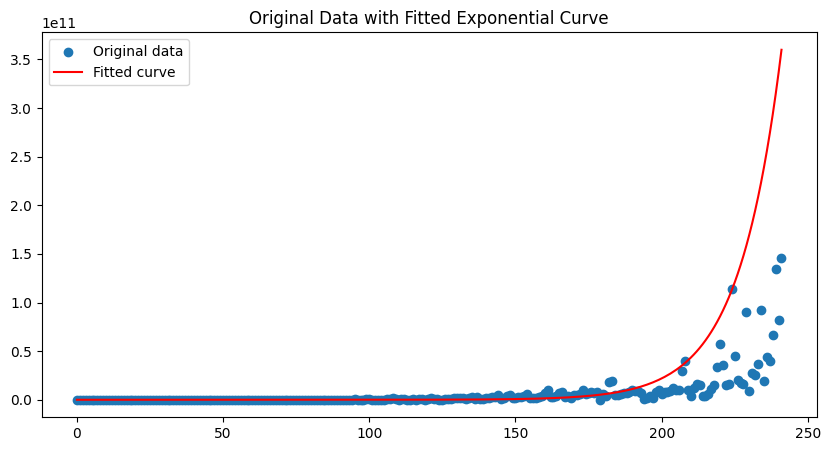

In [93]:
# Define the function to fit the exponential curve
def myfunc(x, a, b):
    return a * x + b


y_log = data["N_de_transistores_log"]

# Perform the curve fit
popt, pcov = curve_fit(myfunc, x_scaled, y_log)
print(f"Os coeficientes são: {popt}")


# Plot the original data and the fitted curve
fig, ax = plt.subplots(figsize=(10, 5))

# First subplot with the original data and fitted curve
ax.scatter(x_scaled, y, label="Original data")
ax.plot(x_scaled, np.exp(myfunc(x_scaled, *popt)), "r", label="Fitted curve")
ax.set_title("Original Data with Fitted Exponential Curve")
ax.legend()


plt.show()

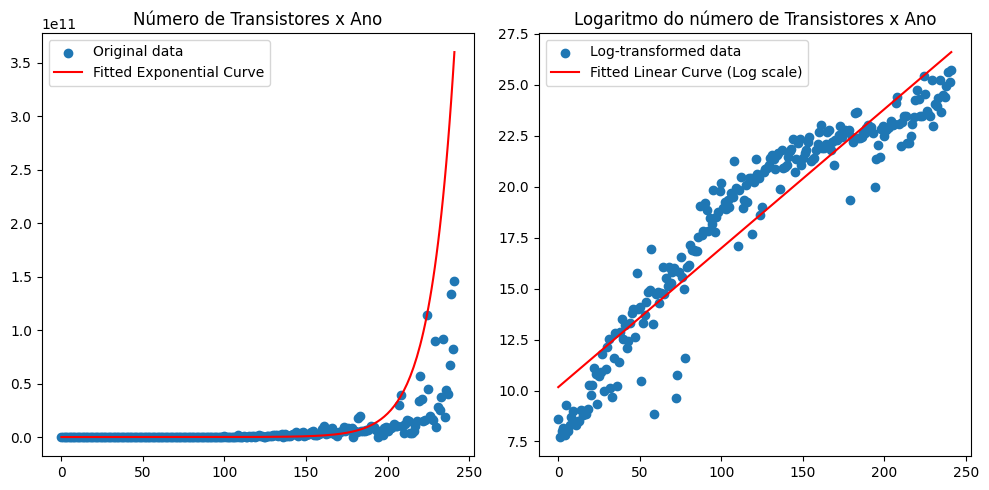

Slope (Taxa de crescimento): 0.06822487837869683
Intercept (Logaritmo do valor inicial): 10.166647352608692


In [81]:
from sklearn.linear_model import LinearRegression

# Apply log transformation to the y values
log_y = np.log(y)

# Reshape x for the linear regression model
x_reshaped = x_scaled.reshape(-1, 1)

# Perform linear regression on the transformed data
linear_model = LinearRegression()
linear_model.fit(x_reshaped, log_y)

# Get the predicted log values
log_y_pred = linear_model.predict(x_reshaped)

# Calculate the fitted exponential curve (inverse of log is exp)
y_pred_exp = np.exp(log_y_pred)

# Plot the original data and the fitted linear (in log space) and exponential curves
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# First subplot with the original data and fitted exponential curve
ax[0].scatter(x_scaled, y, label="Original data")
ax[0].plot(x_scaled, y_pred_exp, "r", label="Fitted Exponential Curve")
ax[0].set_title("Número de Transistores x Ano")
ax[0].legend()

# Second subplot with the logarithmic transformation of y and the linear fit
ax[1].scatter(x_scaled, log_y, label="Log-transformed data")
ax[1].plot(x_scaled, log_y_pred, "r", label="Fitted Linear Curve (Log scale)")
ax[1].set_title("Logaritmo do número de Transistores x Ano")
ax[1].legend()

fig.tight_layout()
plt.show()

# Show the regression coefficients
slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(f"Slope (Taxa de crescimento): {slope}")
print(f"Intercept (Logaritmo do valor inicial): {intercept}")